### Exercise 1.1
###### Remember to do these exercises in your own notebook in your assessment repository.

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.



This code is adapted from https://stackoverflow.com/a/4941932/17170567

In [79]:
# Math Module
import math

# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Statistical Methods
import scipy.stats as ss

# Alt Stats package
import statsmodels.stats.weightstats as stat

# plotting
import matplotlib.pyplot as plt

In [2]:
#Number of ways of selecting 4 cups from 8
math.comb(8,4)

70

In [3]:
#Number of ways of selecting 5 cups from 10
math.comb(10,5)

252

In [4]:
#Probability of randomly selecting correct 5 cups is:
1.0 / math.comb(10, 5)

0.003968253968253968

So if the experiment was done with 10 cups total, 5 with milk in first and 5 with tea in first the chance of selecting randomly is much less than 1%

We could develop the experiment to have 9 cups in total, 4 with milk first and 5 with tea first, or vice versa.

In [5]:
# Num of ways selecting 4 cups from 9
math.comb(9, 4)

126

In [6]:
# The Probability is then 
1.0/math.comb(9, 4)

0.007936507936507936

Also less than 1% - round to .8%

In [7]:
# Note the number of ways of selecting 5 cups from 9 is also 126
math.comb(9, 5)

126

##### Use scipy's version of Fishers Exact Test to simulate the Lady Tasting Tea Problem

We know from the investigation above that the number of ways of selecting 4 cups from 8 is 70. 
Therefore the odds from a random selection the odds of choosing the 4 cups where the milk has been added first is 1/70 or 0.014285714285714285

In [8]:
# Show 1 divided by 70
1/70

0.014285714285714285

Here I am going to create a table to visualise the data - the code here is adapated from: https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593

In [9]:
#Create Table with Pandas
ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

,Milk_Guess,Tea_Guess
Milk_Poured,4,0
Tea_Poured,0,4


In [10]:
# Add the marginal totals and the grand total
df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk_Guess,Tea_Guess,Row_Total
Milk_Poured,4,0,4
Tea_Poured,0,4,4
Column_Total,4,4,8


First I want to calculate the expected values for each cell in our contingency table. The expected values represent the numbers that should be found in each cell of the table if there’s no association between the two variables “Guess” and “Poured”. For each cell we calculate its expected value by multiplying its respective Row_Total with its respective Column_Total and finally divide by the grand total. In this case that would be **(4/8) * (4/8) * 8** *or* **(4*4) / 8**

In [11]:
# Calculating Expected value in each cell
(4*4) / 8

2.0

This test is a little obvious as with 4 choices out of 8 cups the odds at random would be you would get two right and two wrong, but if you used odd numbers or skewed the data by only filling 3 cups with milk first and 5 with tea first you would get floating numbers as your answers

In [12]:
#Create Table with Pandas
ar=np.array([[5, 0],[0, 3]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

,Milk_Guess,Tea_Guess
Milk_Poured,5,0
Tea_Poured,0,3


In [13]:
# Add the marginal totals and the grand total
df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk_Guess,Tea_Guess,Row_Total
Milk_Poured,5,0,5
Tea_Poured,0,3,3
Column_Total,5,3,8


Here when we multiply the respective Row_Total with its respective Column_Total and divide by the grand total the formula for the expected outcome for each figure would be (5/8) * (3/8) * 8 or (5*3) / 8

In [14]:
# Calculating Expected value in each cell
(5*3) / 8

1.875

So now we have the expected value for each cell (we are going back to the **(4*4) / 8** scenario as that was the original question).
We will now try to use the fisher_exact method from scipy.stats to get the value of the chances of 4 random choices picking the all 4 of exact right cups (tea first is the correct way - I dont care what anyone says!!)

In [16]:
# Run the Fisher_exact method
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

In [17]:
#This is my data
data = [[4,0],[0,4]]

In [18]:
# Running the fisher exact method using the data from my original table
ss.fisher_exact(data)

(inf, 0.028571428571428536)

So here I was expecting to get the value of 1/70 or 0.014285714285714285 to be exact. However as you can see the figure produced from the code above does not match, however it is suspisiously almost exactly double what I expected (beyond 10 decimal places). So here I went back to the scipy.stats Fisher Exact Test documentation, see link here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html  
From the documentation I could see that there were numerous values that defines the hypothesis using the "alternative" parameter.

 - ‘two-sided’: the odds ratio of the underlying population is not one (THIS IS THE DEFAULT IF NO VALUE IS DECLARED)
 - ‘less’: the odds ratio of the underlying population is less than one
 - ‘greater’: the odds ratio of the underlying population is greater than one

Now we KNOW that the odds ratio of the underlying population is (CALCULATE THE ODDS RATIO)

In [19]:
ss.fisher_exact([[4,0],[0,4]], alternative='greater')

(inf, 0.014285714285714268)

#### *Bonus Excercise for 1.1:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

In [20]:
ss.fisher_exact([[7,1],[1,7]], alternative='greater')

(49.0, 0.00505050505050505)

In [21]:
import numpy as np
import pandas as pd
import scipy.special

In [22]:
#Create Table with Pandas
ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk_Guess", "Tea_Guess"])
df.index=["Milk_Poured", "Tea_Poured"] 
df 

,Milk_Guess,Tea_Guess
Milk_Poured,4,0
Tea_Poured,0,4


In [23]:
n=df2.at["Column_Total", "Row_Total"]  # grand total 

exp=df2.copy()               # create dataframe with expected frequencies
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to nearest hundredths:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(2) 
        exp.at[x,y]=float(v)

exp

,Milk_Guess,Tea_Guess,Row_Total
Milk_Poured,3.12,1.88,5
Tea_Poured,1.88,1.12,3
Column_Total,5.00,3.00,8


In [24]:
def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

p(1) # if we try "a=1" we get the following probability ... 

0.0

In [25]:
p_observed=p(7) # In our contingency table, a was equal to 7.

p_list=[]
for i in range(int(df2.iloc[0,2])  + 1  ): # calculate p(a) for every possible table we can get given the fixed margins...
#... this ranges from "9 choose 0" to "9 choose 9" so we should get 10 possible tables and their respective probabilities..
    if p(i)<=p_observed:
        p_list.append(p(i))     # append these probabilites to p_list only if <= p_observed
        
p_val=np.sum(p_list) # the sum of this list corresponds to the p-value 
p_val 

0.0

# The t-Test

**A *t-test* is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related.**  
T-tests are used when the data sets follow a normal distribution and have unknown variances, like the data set recorded from flipping a coin 100 times.  

##### Key Takeaways
 - A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables.  
 - The t-test is a test used for hypothesis testing in statistics.  
 - Calculating a t-test requires three fundamental data values including the difference between the mean values from each data set, the standard deviation of each group, and the number of data values.  
 - T-tests can be dependent or independent.  
 
 ##### Assumptions of a **t-Test**
Four assumptions are made while using a t-test.  
 - The data collected must follow a continuous or ordinal scale, such as the scores for an IQ test.  
 - The data is collected from a randomly selected portion of the total population.  
 - The data will result in a normal distribution of a bell-shaped curve.  
 - Equal or homogenous variance exists when the standard variations are equal.  
[Investopedia](https://www.investopedia.com/terms/t/t-test.asp)

### Simulated Data

In [60]:
# Parameters for two different sets of numbers
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4

# Sample size
N=40

# Create two lists of numbs nased on bell-shaped pabability curves.

a = np.random.normal(loc = m_a, scale = s_a, size = N)
b = np.random.normal(loc = m_b, scale = s_b, size = N)

# Both Samples in one Dataframe(DF)
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value':np.hstack([a,b])})

# Look at the nums
df


,Category,Value
0,A,1.773180
1,A,0.853390
2,A,1.239123
3,A,0.391622
4,A,0.968579
...,...,...
75,B,2.191055
76,B,1.933469
77,B,2.057730
78,B,1.730230


### Visualisation

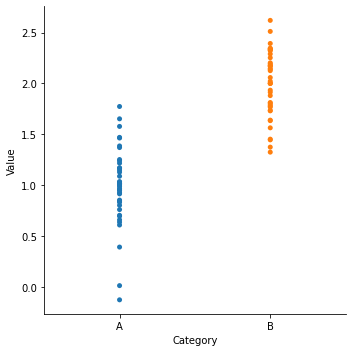

In [61]:
# Display DF in Catplot
sns.catplot(x = 'Category', y = "Value", jitter = False, data=df)

#### t-Test Example using built in packages

In [66]:
# Scipy.stats t-Test

t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value:{p_ss}")
print(f"P_scipy: {p_ss:0.2f}")


t-value: -12.68320325560234	p-value:1.2066731706752242e-20
P_scipy: 0.00


In [67]:
#Stats model version
t_sm, p_sm, d_sm = stat.ttest_ind(a,b)
print (f"t-value:{t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value:-12.68320325560234	p-value: 1.2066731706752242e-20	Deg Free: 78.0
P_statsmodels: 0.00


#### t-Test Example manually done

In [75]:
# Calcualte the t statistic by hand

#Lenghth of the arrays
n1 = len(a)
n2 = len(b)

# Means of the samples
m1 = np.mean(a)
m2 = np.mean(b)

# Sample Standard Deviations
s1 = np.sqrt(np.sum((a - m1)**2) / (n1-1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n2-1))

df = n1 + n2 - 2
#print (df)

In [76]:

sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1-m2) / (np.sqrt(sp2)* np.sqrt(1.0/n1 + 1.0/n2))
t

-12.683203255602342

### Populations (Set of Numbers)
t-Tests perform calculations aon the samples from two populations to test whether the populations are likely similar.  

In the real world we only see the samples and we cannot see the populations

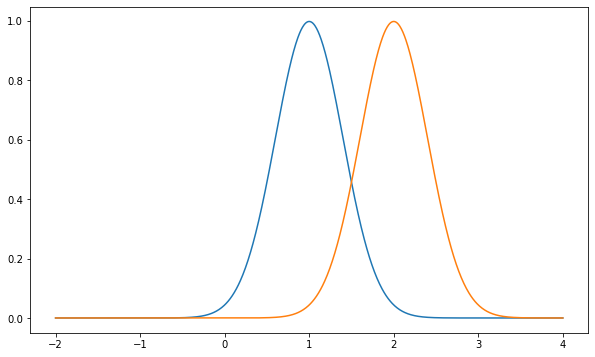

In [81]:
# Creatate a plot with the following values
x = np.linspace(-2.0, 4.0, 1000)

# Plot 2 different populations on one axis
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

### Critical Value

The critical value is used to make a decision regarding the calculation of the *t* statistic from the samples.

If the probability of seeing such a *t* value given the hypothesis that there is no difference between the means is low, then the data is suggesting that you should reject the hypothesis

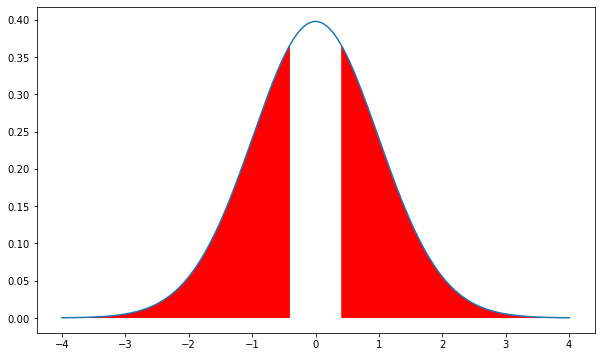

In [82]:
# Build the plot as an example

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d_sm)
tf = pd.DataFrame({'x':x_t, 't': t})

tcrit = abs(ss.t.pdf(0.025, d_sm))
one = tf[tf['x']>= tcrit]
two = tf[tf['x']<= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor = 'red')
ax.fill_between(two['x'], two['t'], 0, facecolor = 'red')

plt.show()


### Type 1 Errors - False Positives


In [87]:
# Run 10000 t-tests where the means are equal
# We should make the "wrong" decision (reject the hypothesis)(100*critical) per cent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc = m_a, scale = s, size = N)
    b = np.random.normal(loc = m_b, scale = s, size = N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 *(rejects / trials)
print (f"{typei:0.2f}%")

4.88%


### Type 2 errors - False negatives
The chance of a false negative is harder to quantify.

It depends how close the means are.

In [89]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc = m_a, scale = s, size = N)
    b = np.random.normal(loc = m_b, scale = s, size = N)
    if ss.ttest_ind(a, b)[1] > critical:
        dont = dont + 1

typeii = 100.0 *(dont / trials)
print (f"{typeii:0.2f}%")

34.92%


### Paired Samples

Here we try a slightly different *t* test on repeated measures

In [90]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [92]:
drugA = dfsleep[dfsleep["group"]==1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [93]:
drugB = dfsleep[dfsleep["group"]==2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [94]:
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [95]:
ss.ttest_1samp(drugB-drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [96]:
stat.DescrStatsW(drugB-drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

### Problems with multiple *t-Tests*

Suppose we want to compare 3 groups - can 3 *t-Tests* be run in parallel

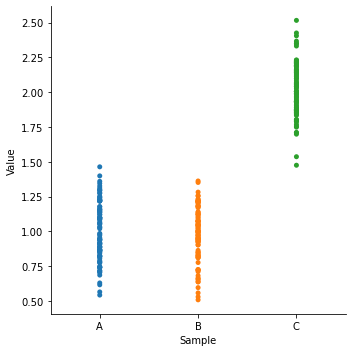

In [98]:
#Size of each sample
N=100

#Create 3 Samples
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

#Put Samples in a single df
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples
sns.catplot(x = 'Sample', y = 'Value', jitter = False, data = dfsamps)

In [100]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f} \tp_AC: {p_AC:.2f} \tp_BC: {p_BC:.2f}")

p_AB: 0.64 	p_AC: 0.00 	p_BC: 0.00


In [109]:
# Run 1000 tests, remembering the Type I errors

falsepos = 0

for i in range (1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(B, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print (f"False Positive Rate: {falsepos / 10}%")

False Positive Rate: 12.6%


As you can see even with the critical value at 5% we are still getting false positisve at a much higher rate (I ran this around 20 times and it returned at a rate between 10.6-13.9% (mostly around the 11.5% mark)

### Analysis of Varience (ANOVA)

ANOVA can be used to avoid a higher Type 1 Error Rate

In [111]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

F:906.60 P:0.00
